<style>
.container { width: 80% !important; margin: auto; }
div.cell { padding: 10px 15% 10px 15%; }
</style>

## DTSC 2301 Spring 2026 Homework #2

Turn in your assignment via Gradescope

Due 1/25/26, 11:59pm



#### Question 1
In the file `https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ironman1819.csv', there is data on female finishers of the 2018 and 2019 Ironman Triathlon in Lake Placid, NY.  We will focus on the times to complete the three elements of the triathlon, swimming (SwimTime), biking (BikeTime) and running (RunTime).  The units for each of these features is minutes.  The overall time (including transitions from on element to the next) is found in *OverallTime*. Create a scatterplot for *SwimTime* as a predictor for *RunTime*.

More on these data as well as a video introduction to them can be found at: https://isle.stat.cmu.edu/SCORE/ironman_triathlon/

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pylab as py
import seaborn as sns
from sklearn.metrics import r2_score, root_mean_squared_error


In [4]:
df = pd.read_csv('https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ironman1819.csv', na_values=['NA', ''])
df.head()

,Bib,Name,Country,Gender,Division,Division.Rank,OverallTime,OverallRank,SwimTime,SwimRank,BikeTime,BikeRank,RunTime,RunRank,FinishStatus,Location,Year
0,1,Heather Jackson,United States,Female,FPRO,1,558.816667,2,60.966667,86,304.733333,15,188.483333,5,Finisher,LakePlacid,2018
1,7,Jen Annett,Canada,Female,FPRO,2,573.800000,4,62.966667,128,304.983333,16,200.766667,26,Finisher,LakePlacid,2018
2,2,Sarah Piampiano,United States,Female,FPRO,3,583.400000,8,64.666667,178,325.383333,40,187.516667,3,Finisher,LakePlacid,2018
3,3,Jodie Robertson,United States,Female,FPRO,4,589.933333,15,62.333333,113,314.950000,22,203.816667,36,Finisher,LakePlacid,2018
4,15,Lenny Ramsey,Netherlands,Female,FPRO,5,597.883333,23,66.450000,250,335.400000,74,189.266667,8,Finisher,LakePlacid,2018


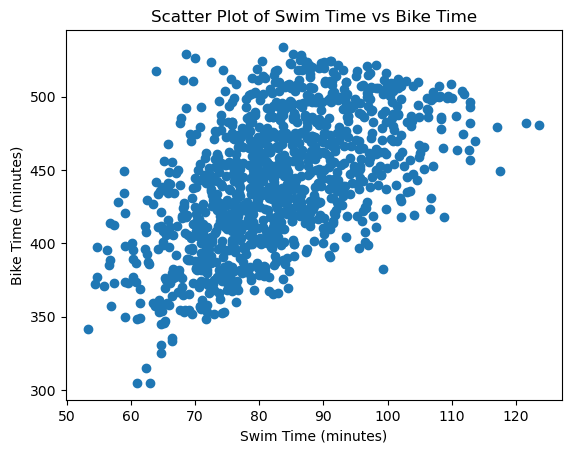

In [5]:
plt.scatter(df['SwimTime'], df['BikeTime'])
plt.xlabel('Swim Time (minutes)')
plt.ylabel('Bike Time (minutes)')   
plt.title('Scatter Plot of Swim Time vs Bike Time')
plt.show()

#### Question 2
Using the Ironman Triathlon data from above, fit a regression model that predicts *OverallTime* from *BikeTime* and add that line to a scatterplot of those two variables.  Interpret the slope and the y-intercept of this model in the context of these data.  

In [6]:
Triathlon_model = LinearRegression()
bt_x = df[['BikeTime']]
y = df['OverallTime']
Triathlon_model.fit(bt_x, y)


LinearRegression()

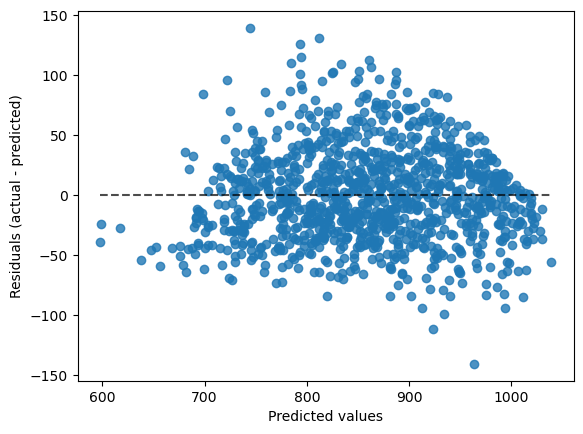

In [7]:
from sklearn.metrics import PredictionErrorDisplay
y_hat = Triathlon_model.predict(bt_x)
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat)
display.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

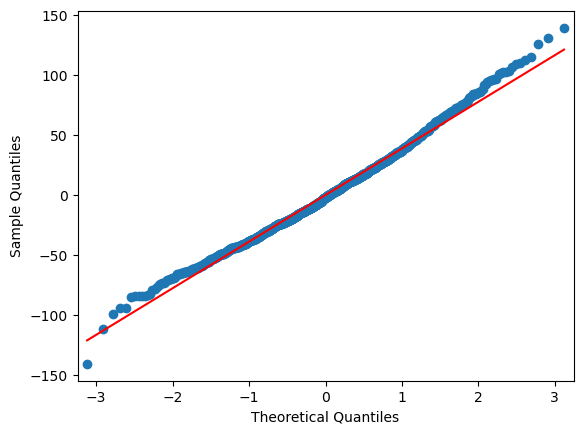

In [8]:
y_hat = Triathlon_model.predict(bt_x)
risiduals = y - y_hat
sm.qqplot(risiduals, line ='s')
py.show

In [9]:
bt_x2 = sm.add_constant(bt_x)
model = sm.OLS(y, bt_x2).fit()
print(model.summary())
biketime_r2 = r2_score(y, y_hat)
biketime_rsme = root_mean_squared_error(y, y_hat)

                            OLS Regression Results                            
Dep. Variable:            OverallTime   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     5312.
Date:                Sun, 25 Jan 2026   Prob (F-statistic):               0.00
Time:                        15:41:02   Log-Likelihood:                -5612.5
No. Observations:                1105   AIC:                         1.123e+04
Df Residuals:                    1103   BIC:                         1.124e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2039     11.712      0.957      0.3

The prediction equation is $\hat{y} =  11.2 + 1.92$ BikeTime.  So our estimated slope is 1.92 and our estimated y-intercept is 11.2.
This means that we would predict the Overall time when Biketime = 0 minutes is 11.2 minutes. For each one-unit increase in BikeTime , the model predicts an average increase of 1.9248 units in OverallTime

#### Question 3
Using the Ironman Triathlon data from above, fit a regression model that predicts *OverallTime* from *RunTime*.   Interpret the slope and the y-intercept of this model in the context of these data.  

In [10]:
Triathlon_model2 = LinearRegression()
x2 = df[['RunTime']]
y2 = df['OverallTime']
Triathlon_model2.fit(x2, y2)

LinearRegression()

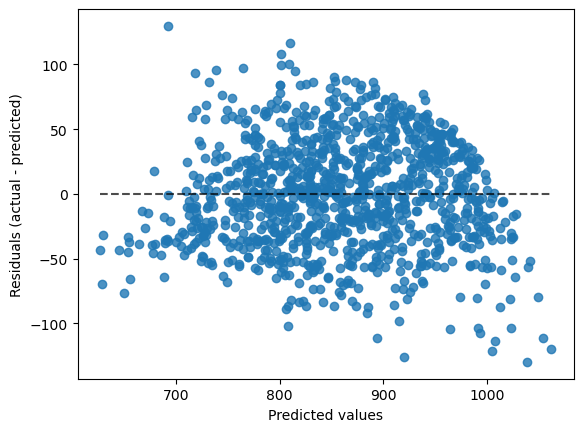

In [11]:
y_hat = Triathlon_model2.predict(x2)
display = PredictionErrorDisplay(y_true=y, y_pred=y_hat)
display.plot()
plt.show()

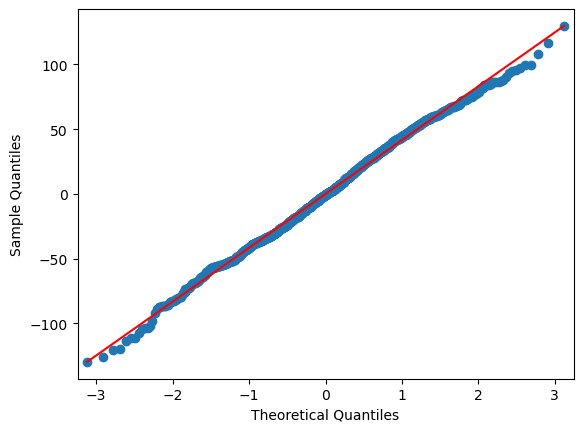

In [12]:
y_hat2 = Triathlon_model2.predict(x2)
risiduals2 = y2 - y_hat2
sm.qqplot(risiduals2, line ='s')
py.show()

In [13]:
rt_x2 = sm.add_constant(x2)
Triathlon_model2 = sm.OLS(y2, rt_x2).fit()
print(Triathlon_model2.summary())
runtime_r2 = r2_score(y2, y_hat2)
runtime_rsme = root_mean_squared_error(y2, y_hat2)

                            OLS Regression Results                            
Dep. Variable:            OverallTime   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     4497.
Date:                Sun, 25 Jan 2026   Prob (F-statistic):               0.00
Time:                        15:41:02   Log-Likelihood:                -5687.5
No. Observations:                1105   AIC:                         1.138e+04
Df Residuals:                    1103   BIC:                         1.139e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        294.1263      8.539     34.444      0.0

The prediction equation is $\hat{y} =  294.13 + 1.77$ BikeTime.  So our estimated slope is 1.77 and our estimated y-intercept is 294.13.
This means that we would predict the Overall time when RunTime = 0 is 294.13 minutes. For each one-unit increase in RuneTime , the model predicts an average increase of 1.924877 units in OverallTime

#### Question 4
Compare the model from Question 3 with the model from Question 2 and determine which model is better.  Justify your answer.

In [14]:
print(f'Bike Time Model: R^2 = {biketime_r2}, RMSE = {biketime_rsme}')
print(f'Run Time Model: R^2 = {runtime_r2}, RMSE = {runtime_rsme}')

Bike Time Model: R^2 = 0.8280709273393042, RMSE = 38.86974781703382
Run Time Model: R^2 = 0.8030507091188902, RMSE = 41.60200610090317


The Bike time model is better because the R^2 is better and the RSME is lower in comparison to the Run time model.

#### Question 5
Open the first day survey data, make a new variable that is 1 if the student has a job, either on-campus or off-campus.  Call that variable *job*.  Then make a side by side boxplot of *job* vs *NumbContacts*.  Comment on whether or not there seems to be a relationship between having a job and the number of contacts in their cell phone among DTSC 2301 students.

In [31]:
first_day = pd.read_excel('DTSC 2301 First Day Survey (Responses).xlsx', na_values=['NA', ''])
first_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 19 columns):
 #   Column                                                                               Non-Null Count  Dtype         
---  ------                                                                               --------------  -----         
 0   Timestamp                                                                            70 non-null     datetime64[ns]
 1   In which section of DTSC 2301 are you enrolled?                                      70 non-null     object        
 2   What was the cost of your last haircut?                                              69 non-null     object        
 3   How long (in hours) did take you to travel to campus for the start of the semester?  69 non-null     object        
 4   Is Charlotte home?                                                                   69 non-null     object        
 5   Is North Carolina home?                      

In [ ]:
# create job indicator (1 if job on-campus or off-campus)
first_day['job_on'] = first_day['Do you have a job on campus?'].fillna('No').astype(str).str.strip().str.lower()
first_day['job_off'] = first_day['Do you have a job off campus?'].fillna('No').astype(str).str.strip().str.lower()
first_day['job'] = np.where((first_day['job_on'] == 'yes') | (first_day['job_off'] == 'yes'), 1, 0)

# clean contacts and create NumbContacts numeric column
contacts_col = 'How many contacts do you have in your cell phone?'
contacts = first_day[contacts_col].astype(str).str.strip().str.lower().replace({'none': '0'})
first_day['NumbContacts'] = pd.to_numeric(contacts, errors='coerce')

# side-by-side boxplot of job vs NumbContacts
sns.boxplot(x='job', y='NumbContacts', data=first_day)
plt.xlabel('Job (0 = no, 1 = yes)')
plt.ylabel('Number of contacts')
plt.title('Number of Contacts by Job Status')
plt.show()

# print medians and a brief comment
medians = first_day.groupby('job')['NumbContacts'].median()
print('Median NumbContacts by job:')
print(medians)

if set(medians.index) >= {0, 1}:
    diff = medians.loc[1] - medians.loc[0]
    if abs(diff) >= 50:
        print(f'Students with a job have noticeably {"more" if diff>0 else "fewer"} contacts (median difference = {diff:.1f}).')
    else:
        print(f'No strong relationship observed (median difference = {diff:.1f} contacts).')

#### Question 6

Read the article "Understanding Passive vs Proactive Ethics" by Bill Schmarzo on Canvas.  Then fill in the following blanks:
1. Proactive Ethics focuses on "do good" while passive ethics focuses on "do no harm".
2. In the Good Samaritan story, passive ethics is represented by AI model and AI utility function.
3. (True or False) The author argues that "do no harm" is sufficient as an ethics standard for AI: False.

